<a href="https://colab.research.google.com/github/SudeshnaBora/aand_numerical/blob/master/AAND_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Name:</b> Sudeshna Bora

<b> Assignment:</b> 02 

<b> Time Taken:</b> 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import math


In [2]:
spike_times_array = np.loadtxt('SpikeTimes.dat')
spike_times_array.shape


(100, 100)

spike_times_array is an MXN matrix where M is the spike time index and N is trials. 

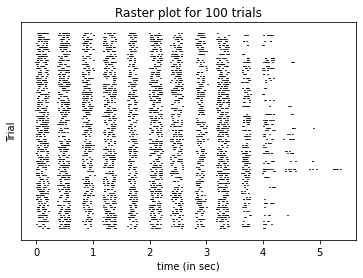

In [3]:
#Transpose the matrix into NXM so that each row represents each trials
spike_times_records = spike_times_array.T


eventRecord = list() #Store the spike_train individual trial records without nan
lineoffset = 1
offset = .0002
for i in range(100):
  x = spike_times_records[i,:]
  x = x[~np.isnan(x)]
  eventRecord.append(x)
  plt.eventplot(x*10**-3, colors='black', lineoffsets=lineoffset,linelengths=0.0001)
  lineoffset = lineoffset+offset
plt.yticks([])
plt.title('Raster plot for 100 trials')
plt.xlabel('time (in sec)')
plt.ylabel('Trial')
plt.show()


In [0]:
def window_func(spike_train, dt, duration:float,super_title, function):
  t = np.arange(0, duration, 0.0001)
  fig, axs = plt.subplots(3, figsize=(10,12))
  plt.subplots_adjust(hspace = 0.5)

  for i in range(len(dt)):
    window = function(dt[i])
    rates = np.convolve(spike_train, window, mode = 'same') 
    axs[i].plot(t, rates[0 : int(duration * 10000)]*10, 'k')
    axs[i].set(title =  f' {dt[i]*1000} ms', xlabel = 'Time (s)', ylabel = 'Firing rate (spikes/s)', xlim = (0, duration))
  plt.suptitle(super_title)


def rectange_window(width):
  rct = (1/width) * np.ones(int(width*10000))
  return rct

widths = np.array([30, 90, 200])/1000






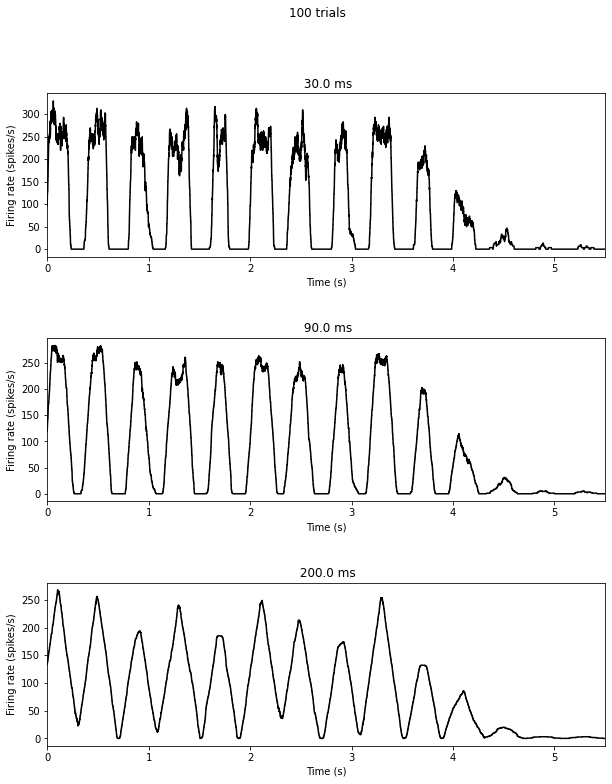

In [5]:

trial_length = 5.5

#as resolution is 0.1 ms , we will multiply by 10000

spikes = np.zeros((int(trial_length * 10000), 100))

#calculate response function
for i in range(100):
  for element in spike_times_array[:,i] * 10:
    if ~np.isnan(element):
      spikes[int(element), i] = 1

mean_trials= np.mean(spikes, axis=1)

window_func(mean_trials, dt = widths, duration = trial_length,super_title = '100 trials', function = rectange_window)


In [0]:
#create indices for different trails 
row_index_10 = np.random.randint(low = 0, high = 100 , size = 10) # row index
row_index_50 = np.random.randint(low = 0, high = 100 , size = 50)

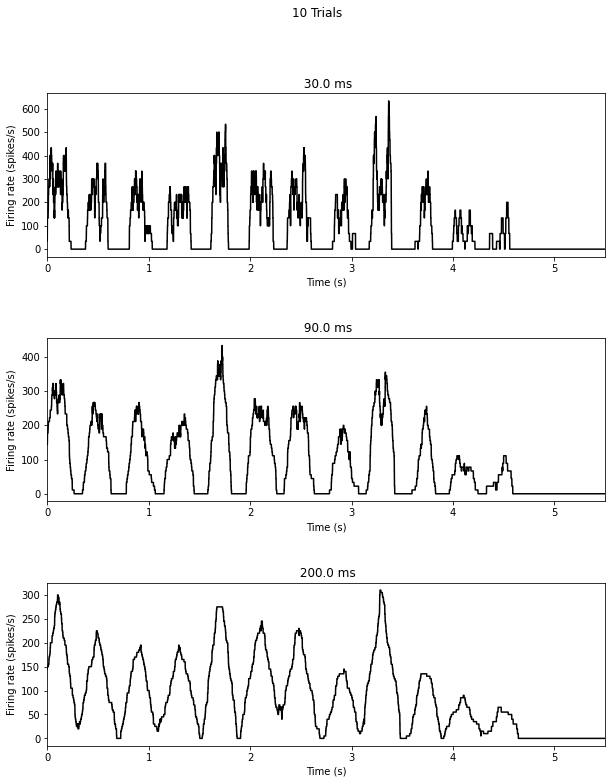

In [7]:
trial_length = 5.5

#as resolution is 0.1 ms , we will multiply by 10000

spikes = np.zeros((int(trial_length * 10000), 10))

#calculate response function
for index,i in enumerate(row_index_10):
  for element in spike_times_array[:,i] * 10:
    if ~np.isnan(element):
      spikes[int(element), index] = 1

mean_trials= np.mean(spikes, axis=1)

window_func(mean_trials, dt = widths, duration = trial_length,super_title = '10 Trials', function = rectange_window)

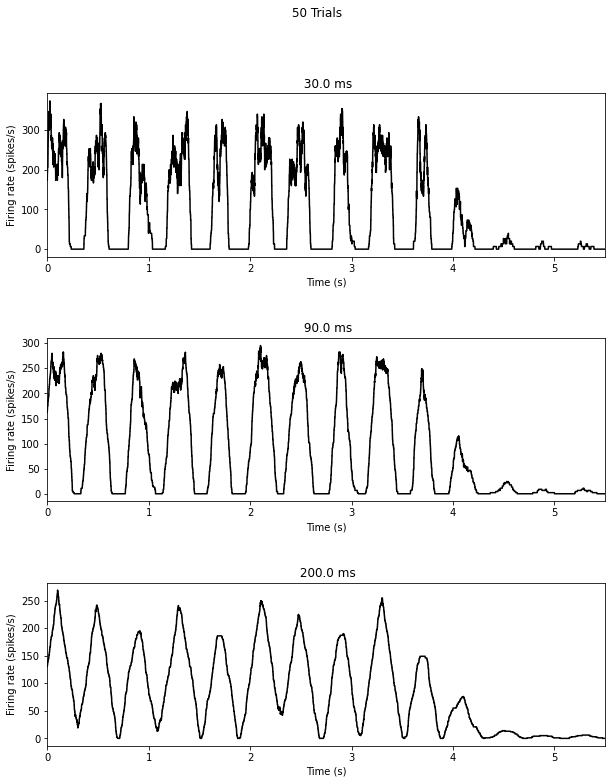

In [8]:
trial_length = 5.5

#as resolution is 0.1 ms , we will multiply by 10000

spikes = np.zeros((int(trial_length * 10000), 50))

#calculate response function
for index,i in enumerate(row_index_50):
  for element in spike_times_array[:,i] * 10:
    if ~np.isnan(element):
      spikes[int(element), index] = 1
mean_trials= np.mean(spikes, axis=1)
window_func(mean_trials, dt = widths, duration = trial_length,super_title = '50 Trials', function = rectange_window)

In [0]:
sta_data = sio.loadmat("STA_data.mat")

In [0]:
spike_time_array02 = sta_data['SpikeTimes'] # 744X100, 100 trials with 744 spike time index
stimulus = sta_data['Stimulus'] # 1X10000
trial_length = 1 # in second with resolution 0.1ms
tau = 10 # adjusting resolution


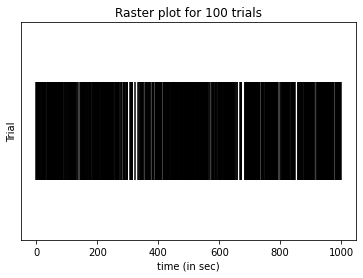

In [11]:
#Transpose the matrix into NXM so that each row represents each trials
spike_times_records = spike_time_array02.T


lineoffset = 1
offset = .01
for i in range(100):
  x = spike_times_records[i,:]
  plt.eventplot(x, colors='black', lineoffsets=lineoffset,linelengths=0.0001)
  lineoffset = lineoffset+offset
plt.yticks([])
plt.title('Raster plot for 100 trials')
plt.xlabel('time (in sec)')
plt.ylabel('Trial')
plt.show()

In [0]:
#for each row in spike_time_array*10

stim_sum = np.zeros((spike_time_array02.shape))
for i,row in enumerate(spike_time_array02*10):
  for j,element in enumerate(row): #element will become the index
     if element >= tau and ~np.isnan(element):
       stimulus_sum = np.sum(stimulus.T[int(element):int(element) - tau:-1]) #summing all the stimulus for that spike
       stim_sum[i,j] = stimulus_sum 
  #stim_sum[i] = stim_sum[i]/100

STA = np.mean(stim_sum,axis=1)
       


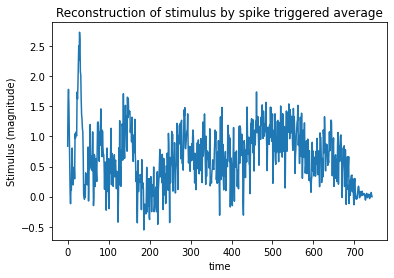

In [13]:
plt.plot(STA)
plt.xlabel('time')
plt.ylabel('Stimulus (magnitude)')
plt.title('Reconstruction of stimulus by spike triggered average')
plt.show()